In [62]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import statsmodels.api as sm
import statsmodels.tools

In [63]:
df = pd.read_csv('../Data/dataset_for_modelling.csv')
df.reset_index(drop=True, inplace=True)
df.shape[0]

4009

In [64]:
df.head()

,url,address,property_type,bedrooms,bathrooms,tenure,nearest_station,price,cleaned_address,gcode,outcode_from_gcode,outcode
0,https://www.rightmove.co.uk/properties/1315844...,"Queen Square, Leeds",Detached,5,2,Freehold,0.7,550000,"Queen Square, Leeds","Queen Square, Arena Quarter, Lovell Park, Leed...","Yorkshire,",LS2
1,https://www.rightmove.co.uk/properties/8604795...,"Archery Road, Leeds, West Yorkshire",Terraced,5,1,Freehold,1.0,325000,"Archery Road, Leeds, West Yorkshire","Archery Road, Arena Quarter, Woodhouse, Leeds,...",LS2,LS2
2,https://www.rightmove.co.uk/properties/1326138...,"Hanover Square, Leeds",Terraced,6,3,Freehold,0.8,450000,"Hanover Square, Leeds","Hanover Square, Hyde Park, Leeds, West Yorkshi...",LS3,LS3
3,https://www.rightmove.co.uk/properties/1311469...,"Burley Wood Crescent, Burley, LEEDS",Terraced,3,1,Freehold,0.5,220000,"Burley Wood Crescent, Burley, LEEDS","Burley Wood Crescent, Burley, Leeds, West York...",LS4,LS4
4,https://www.rightmove.co.uk/properties/1322668...,"The Village Street, Burley, Leeds",Detached,5,2,Freehold,0.2,325000,"The Village Street, Burley, Leeds","The Village Street, Burley, Leeds, West Yorksh...",LS4,LS4


# Train/Test splitting

In [65]:
# Can see that the LS23, LS3, BD1, LS2, LS22 outcodes have a small number of observations
# Need to drop these rows as they can cause an issue when One Hot Encoding outcodes, test will have a different number of features compared to train
# 12 rows needed to bed dropped
df['outcode'].value_counts().sort_values()

LS23      1
LS3       1
BD1       2
LS2       2
LS22      5
       ... 
LS25    104
WF10    106
LS15    119
WF2     137
WF4     141
Name: outcode, Length: 85, dtype: int64

In [66]:
# Finding rows that need to be dropped
df[(df['outcode'] == 'LS23') | (df['outcode'] == 'LS3') | (df['outcode'] == 'BD1') | (df['outcode'] == 'LS2') | (df['outcode'] == 'LS22')]

,url,address,property_type,bedrooms,bathrooms,tenure,nearest_station,price,cleaned_address,gcode,outcode_from_gcode,outcode
0,https://www.rightmove.co.uk/properties/1315844...,"Queen Square, Leeds",Detached,5,2,Freehold,0.7,550000,"Queen Square, Leeds","Queen Square, Arena Quarter, Lovell Park, Leed...","Yorkshire,",LS2
1,https://www.rightmove.co.uk/properties/8604795...,"Archery Road, Leeds, West Yorkshire",Terraced,5,1,Freehold,1.0,325000,"Archery Road, Leeds, West Yorkshire","Archery Road, Arena Quarter, Woodhouse, Leeds,...",LS2,LS2
2,https://www.rightmove.co.uk/properties/1326138...,"Hanover Square, Leeds",Terraced,6,3,Freehold,0.8,450000,"Hanover Square, Leeds","Hanover Square, Hyde Park, Leeds, West Yorkshi...",LS3,LS3
303,https://www.rightmove.co.uk/properties/1276659...,"Primrose Lane, Leeds, West Yorkshire",Terraced,2,1,Freehold,1.2,130000,"Primrose Lane, Leeds, West Yorkshire","Primrose Lane, Boston Spa, Leeds, West Yorkshi...",LS23,LS23
570,https://www.rightmove.co.uk/properties/1314056...,"Chestnut Avenue, Leeds, West Yorkshire",Terraced,5,2,Freehold,0.2,425000,"Chestnut Avenue, Leeds, West Yorkshire","Chestnut Avenue, Spofforth Hill, Wetherby, Lee...",LS22,LS22
639,https://www.rightmove.co.uk/properties/1322315...,"Chestnut Avenue, Leeds, West Yorkshire",Terraced,3,1,Freehold,0.2,280000,"Chestnut Avenue, Leeds, West Yorkshire","Chestnut Avenue, Spofforth Hill, Wetherby, Lee...",LS22,LS22
645,https://www.rightmove.co.uk/properties/1318034...,"Chestnut Avenue, Leeds",Terraced,3,1,Freehold,0.2,260000,"Chestnut Avenue, Leeds","Chestnut Avenue, Spofforth Hill, Wetherby, Lee...",LS22,LS22
648,https://www.rightmove.co.uk/properties/1324542...,"Chestnut Avenue, Leeds",Terraced,3,1,Freehold,0.2,250000,"Chestnut Avenue, Leeds","Chestnut Avenue, Spofforth Hill, Wetherby, Lee...",LS22,LS22
751,https://www.rightmove.co.uk/properties/1317881...,"Linton Road, Leeds",Detached,3,1,Freehold,3.7,499950,"Linton Road, Leeds","Linton Road, Collingham, Linton, Leeds, West Y...",LS22,LS22
1345,https://www.rightmove.co.uk/properties/1239623...,"Hanover Square, Bradford, West Yorkshire, BD1",Terraced,5,2,Freehold,0.4,200000,"Hanover Square, Bradford, West Yorkshire, BD1","Hanover Square, Manningham, Bradford, West Yor...",BD1,BD1


In [67]:
# Drop rows that cause issues OHE
df = df.drop([0, 1, 2, 303, 570, 639, 645, 648, 751, 1345, 1346])

In [68]:
# 11 rows dropped left with 3998 rows
df.shape[0]

3998

In [69]:
# Check the value counts remaining
df['outcode'].value_counts().sort_values()

BD24     10
BD3      13
LS5      15
BD8      15
LS4      15
       ... 
LS25    104
WF10    106
LS15    119
WF2     137
WF4     141
Name: outcode, Length: 80, dtype: int64

In [70]:
# Check the number of unique outcodes now being represented in the dataset
df['outcode'].nunique()

80

In [71]:
# Get the outcodes
outcodes = df['outcode'].unique()

In [72]:
# Put the outcodes in a dataframe
outcodesdf = pd.DataFrame(outcodes, columns=['outcodes'])

In [73]:
# Save the outcodes to a csv
outcodesdf.to_csv('outcodes_for_modelling.csv')

In [74]:
# Create a list of all features
allfeatures = list(df.columns)

In [75]:
allfeatures.remove('price')

In [76]:
# Create X, and y.
X = df[allfeatures]
y = df['price']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Feature engineering

In [78]:
def feature_eng_ohe_outcode_and_proptype(df):
    # Drop following columns
    df = df.drop(columns=['url', 'address', 'tenure', 'cleaned_address','gcode','outcode_from_gcode'])
    # One Hot Encode following columns
    df = pd.get_dummies(df, columns = ['property_type'], drop_first = True, prefix = 'Prop_Type')
    df = pd.get_dummies(df, columns = ['outcode'], drop_first = True, prefix = 'Outcode')
    # Add constant
    df = sm.add_constant(df)
    return df

In [79]:
def feature_eng_ohe_proptype_only(df):
    # Drop following columns
    df = df.drop(columns=['url', 'address', 'tenure', 'cleaned_address','gcode','outcode_from_gcode', 'outcode'])
    # One Hot Encode following columns
    df = pd.get_dummies(df, columns = ['property_type'], drop_first = True, prefix = 'Prop_Type')
    # Add constant
    df = sm.add_constant(df)
    return df

# Linear Regression - Model 1

- Use all available features apart from outcode feature
- So used: bedrooms, bathrooms, nearest_station, property_type (One Hot Encoded)

In [80]:
## Transform
X_train = feature_eng_ohe_proptype_only(X_train)

In [81]:
X_train.head()

,const,bedrooms,bathrooms,nearest_station,Prop_Type_Semi-Detached,Prop_Type_Terraced
1586,1.0,2,1,2.0,0,1
510,1.0,3,2,0.9,1,0
3604,1.0,3,1,1.0,0,1
3573,1.0,1,1,1.0,0,1
3231,1.0,2,1,2.1,0,1


In [82]:
# Function to fit the lin reg model
def linreg_fitter(y_train, X_train):
    lin_reg = sm.OLS(y_train, X_train)
    lin_regfitted = lin_reg.fit()
    return lin_regfitted

In [83]:
model_1 = linreg_fitter(y_train, X_train)
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     920.1
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:20:36   Log-Likelihood:                -40328.
No. Observations:                3198   AIC:                         8.067e+04
Df Residuals:                    3192   BIC:                         8.070e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [84]:
# Make predictions on X_train
y_preds = model_1.predict(X_train)
rmse = statsmodels.tools.eval_measures.rmse(y_train, y_preds)
print(rmse)

72498.23328564498


In [85]:
# Make predictions on X_test
X_test = feature_eng_ohe_proptype_only(X_test)
y_test_preds = model_1.predict(X_test)
rmse = statsmodels.tools.eval_measures.rmse(y_test, y_test_preds)
print(rmse)

71573.20746353721


# Linear Regression Base model  (Use all features) - Model 2

- Use all available features: bedrooms, bathrooms, nearest_station, property_type (One Hot Encoded) and outcode (One Hot Encoded)

In [86]:
# Read in dataset again, do train-test split then feature engineer to get all the OHE columns
allfeatures = list(df.columns)
allfeatures.remove('price')
# Create X, and y.
X = df[allfeatures]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [87]:
## Transform
X_train = feature_eng_ohe_outcode_and_proptype(X_train)

In [88]:
X_train.head()

,const,bedrooms,bathrooms,nearest_station,Prop_Type_Semi-Detached,Prop_Type_Terraced,Outcode_BD11,Outcode_BD12,Outcode_BD13,Outcode_BD14,...,Outcode_WF16,Outcode_WF17,Outcode_WF2,Outcode_WF3,Outcode_WF4,Outcode_WF5,Outcode_WF6,Outcode_WF7,Outcode_WF8,Outcode_WF9
1586,1.0,2,1,2.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
510,1.0,3,2,0.9,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3604,1.0,3,1,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3573,1.0,1,1,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3231,1.0,2,1,2.1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [89]:
# Create the second linear regression model
model_2 = linreg_fitter(y_train, X_train)
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     110.0
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:20:37   Log-Likelihood:                -39550.
No. Observations:                3198   AIC:                         7.927e+04
Df Residuals:                    3113   BIC:                         7.979e+04
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [90]:
# Make predictions on train
y_preds = model_2.predict(X_train)
rmse = statsmodels.tools.eval_measures.rmse(y_train, y_preds)
print(rmse)

56856.14803080461


In [91]:
# Make predictions on X_test
X_test = feature_eng_ohe_outcode_and_proptype(X_test)

In [92]:
X_test.head()

,const,bedrooms,bathrooms,nearest_station,Prop_Type_Semi-Detached,Prop_Type_Terraced,Outcode_BD11,Outcode_BD12,Outcode_BD13,Outcode_BD14,...,Outcode_WF16,Outcode_WF17,Outcode_WF2,Outcode_WF3,Outcode_WF4,Outcode_WF5,Outcode_WF6,Outcode_WF7,Outcode_WF8,Outcode_WF9
1771,1.0,2,1,3.0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3337,1.0,2,1,1.1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1781,1.0,4,1,3.0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3187,1.0,2,1,0.4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2110,1.0,4,2,2.7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
# Make predictions on test
y_test_preds = model_2.predict(X_test)
rmse = statsmodels.tools.eval_measures.rmse(y_test, y_test_preds)
print(rmse)

58457.979035268945


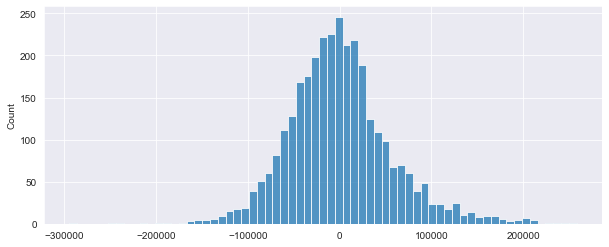

In [94]:
# a histogram of the residuals between y_train and y_pred
residuals = y_train - y_preds
fig = plt.figure(figsize=(10, 4))
sns.histplot(residuals)
plt.show()

# we can see that the residuals are normally distributed, fulfilling one of our assumptions for linear modelling
# However not every variable has a linear relationship with price, nearest_station deffo does not have a linear relationship with price
# So this model fails satisfying all the the assumptions of linear regression

# Linear Regression - Model 3 (all features but nearest_station dropped)

- Make use of all columns including OHE property_type and OHE outcode but drop the nearest_station column

In [95]:
# Get all the OHE columns from model 2 and drop the nearest station column
feature_cols = list(X_train.columns)
feature_cols.remove('nearest_station')

In [96]:
# Create the third linear regression model
model_3 = linreg_fitter(y_train, X_train[feature_cols])
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     108.8
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:20:38   Log-Likelihood:                -39578.
No. Observations:                3198   AIC:                         7.932e+04
Df Residuals:                    3114   BIC:                         7.983e+04
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [97]:
# Make predictions on train
y_preds = model_3.predict(X_train[feature_cols])
rmse = statsmodels.tools.eval_measures.rmse(y_train, y_preds)
print(rmse)

57351.970235022374


In [98]:
# Make predictions on test
y_preds = model_3.predict(X_test[feature_cols])
rmse = statsmodels.tools.eval_measures.rmse(y_test, y_preds)
print(rmse)

58540.59632616724


# Linear Regression (None of OHE features used) - Model 4

- Don't use any of the OHE columns and see how predictions perform
- Only using the bedrooms, bathrooms, nearest_station columns

In [99]:
feature_cols = ['bedrooms', 'bathrooms', 'nearest_station','const']

In [100]:
# Create the fourth linear regression model
model_4 = linreg_fitter(y_train, X_train[feature_cols])
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     984.8
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:20:38   Log-Likelihood:                -40708.
No. Observations:                3198   AIC:                         8.142e+04
Df Residuals:                    3194   BIC:                         8.145e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
bedrooms         6.327e+04   1976.706     

In [101]:
# Make predictions on train
y_preds = model_4.predict(X_train[feature_cols])
rmse = statsmodels.tools.eval_measures.rmse(y_train, y_preds)
print(rmse)

81643.93247612362


In [102]:
# Make predictions on test
y_preds = model_4.predict(X_test[feature_cols])
rmse = statsmodels.tools.eval_measures.rmse(y_test, y_preds)
print(rmse)

82982.41007390394


# Further thoughts

Best model is model 2 that OHE property_type and outcode, and uses the other numerical features of bedroom, bathroom, nearest_station

- Need to find a way to get a better RMSE however
- See if a transformation can improve the linear relationship between the feature and price
- Have a look at if models where Stepwise analysis or VIF analysis have been to decide features and see if these models meet the assumptions of linear regression

# Model made by stepwise regression analysis  

- Stepwise regression analysis of all features possible (OHE columns included)
- See which features are statistically significant with a p-value less than 0.05
- Then observe the RMSE value
- See if meets all four assumptions of linear regression

In [103]:
def stepwise_selection(X, y, threshold_in = 0.01, threshold_out = 0.05, verbose = True):
    # The function is checking for p-values (whether features are statistically significant), the lower the better
    included = [] # this is going to be the list of features we keep
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index = excluded, dtype = 'float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        # we add the feature with the lowest (best) p-value under the threshold to our 'included' list
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval)) # specifying the verbose text

        # backward step: removing features if new features added to the list make them statistically insignificant
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()

        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        # if the p-value exceeds the upper threshold, the feature will be dropped from the 'included' list
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [104]:
X_train.columns

Index(['const', 'bedrooms', 'bathrooms', 'nearest_station',
       'Prop_Type_Semi-Detached', 'Prop_Type_Terraced', 'Outcode_BD11',
       'Outcode_BD12', 'Outcode_BD13', 'Outcode_BD14', 'Outcode_BD15',
       'Outcode_BD16', 'Outcode_BD17', 'Outcode_BD18', 'Outcode_BD19',
       'Outcode_BD2', 'Outcode_BD20', 'Outcode_BD21', 'Outcode_BD22',
       'Outcode_BD23', 'Outcode_BD24', 'Outcode_BD3', 'Outcode_BD4',
       'Outcode_BD5', 'Outcode_BD6', 'Outcode_BD7', 'Outcode_BD8',
       'Outcode_BD9', 'Outcode_HD1', 'Outcode_HD2', 'Outcode_HD3',
       'Outcode_HD4', 'Outcode_HD5', 'Outcode_HD6', 'Outcode_HD7',
       'Outcode_HD8', 'Outcode_HD9', 'Outcode_HX1', 'Outcode_HX2',
       'Outcode_HX3', 'Outcode_HX4', 'Outcode_HX5', 'Outcode_HX6',
       'Outcode_HX7', 'Outcode_LS10', 'Outcode_LS11', 'Outcode_LS12',
       'Outcode_LS13', 'Outcode_LS14', 'Outcode_LS15', 'Outcode_LS16',
       'Outcode_LS17', 'Outcode_LS18', 'Outcode_LS19', 'Outcode_LS20',
       'Outcode_LS21', 'Outcode_LS24', '

In [105]:
# Made sure to remove the const column
result = stepwise_selection(X_train[['bedrooms', 'bathrooms', 'nearest_station',
                                     'Prop_Type_Semi-Detached', 'Prop_Type_Terraced', 'Outcode_BD11',
                                     'Outcode_BD12', 'Outcode_BD13', 'Outcode_BD14', 'Outcode_BD15',
                                     'Outcode_BD16', 'Outcode_BD17', 'Outcode_BD18', 'Outcode_BD19',
                                     'Outcode_BD2', 'Outcode_BD20', 'Outcode_BD21', 'Outcode_BD22',
                                     'Outcode_BD23', 'Outcode_BD24', 'Outcode_BD3', 'Outcode_BD4',
                                     'Outcode_BD5', 'Outcode_BD6', 'Outcode_BD7', 'Outcode_BD8',
                                     'Outcode_BD9', 'Outcode_HD1', 'Outcode_HD2', 'Outcode_HD3',
                                     'Outcode_HD4', 'Outcode_HD5', 'Outcode_HD6', 'Outcode_HD7',
                                     'Outcode_HD8', 'Outcode_HD9', 'Outcode_HX1', 'Outcode_HX2',
                                     'Outcode_HX3', 'Outcode_HX4', 'Outcode_HX5', 'Outcode_HX6',
                                     'Outcode_HX7', 'Outcode_LS10', 'Outcode_LS11', 'Outcode_LS12',
                                     'Outcode_LS13', 'Outcode_LS14', 'Outcode_LS15', 'Outcode_LS16',
                                     'Outcode_LS17', 'Outcode_LS18', 'Outcode_LS19', 'Outcode_LS20',
                                     'Outcode_LS21', 'Outcode_LS24', 'Outcode_LS25', 'Outcode_LS26',
                                     'Outcode_LS27', 'Outcode_LS28', 'Outcode_LS29', 'Outcode_LS4',
                                     'Outcode_LS5', 'Outcode_LS6', 'Outcode_LS7', 'Outcode_LS8',
                                     'Outcode_LS9', 'Outcode_WF1', 'Outcode_WF10', 'Outcode_WF11',
                                     'Outcode_WF12', 'Outcode_WF13', 'Outcode_WF14', 'Outcode_WF15',
                                     'Outcode_WF16', 'Outcode_WF17', 'Outcode_WF2', 'Outcode_WF3',
                                     'Outcode_WF4', 'Outcode_WF5', 'Outcode_WF6', 'Outcode_WF7',
                                     'Outcode_WF8', 'Outcode_WF9']], y_train)

print('resulting features:')
print(result)

Add  bedrooms                       with p-value 0.0
Add  Prop_Type_Terraced             with p-value 9.73168e-96
Add  Prop_Type_Semi-Detached        with p-value 5.01256e-110
Add  bathrooms                      with p-value 3.93751e-43
Add  Outcode_LS29                   with p-value 3.48471e-40
Add  Outcode_LS17                   with p-value 7.61014e-25
Add  Outcode_LS16                   with p-value 2.84962e-24
Add  Outcode_LS18                   with p-value 3.97302e-17
Add  Outcode_LS15                   with p-value 6.63507e-16
Add  Outcode_LS8                    with p-value 7.96125e-17
Add  Outcode_LS28                   with p-value 1.68078e-16
Add  Outcode_LS6                    with p-value 7.62006e-11
Add  Outcode_LS20                   with p-value 3.47763e-10
Add  Outcode_LS21                   with p-value 2.00113e-10
Add  Outcode_LS19                   with p-value 3.02823e-09
Add  Outcode_LS7                    with p-value 4.46214e-09
Add  Outcode_HD9               

In [106]:
# Use the cols identified by the function above
result.append('const')
feature_cols = result

In [107]:
# Create the linear regression model with features decided by stepwise regression analysis
model_stepwise = linreg_fitter(y_train, X_train[feature_cols])
print(model_stepwise.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     180.6
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:21:00   Log-Likelihood:                -39591.
No. Observations:                3198   AIC:                         7.928e+04
Df Residuals:                    3147   BIC:                         7.959e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
bedrooms                 4

- Really good adjusted R2 value in comparison to Model 2, only -0.04
- Cond no is relatively low


In [108]:
# Make predictions on train
y_preds = model_stepwise.predict(X_train[feature_cols])
rmse = statsmodels.tools.eval_measures.rmse(y_train, y_preds)
print(rmse)

57582.83348037722


In [109]:
# Make predictions on test
y_preds_test = model_stepwise.predict(X_test[feature_cols])
rmse = statsmodels.tools.eval_measures.rmse(y_test, y_preds_test)
print(rmse)

58951.613337424606


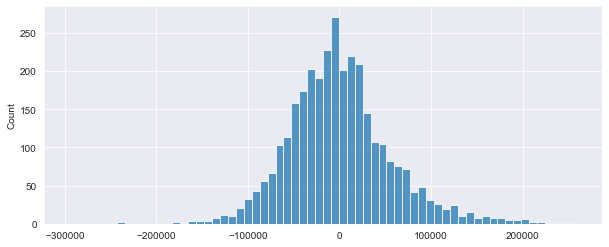

In [110]:
# a histogram of the residuals between y_train and y_pred
residuals = y_train - y_preds
fig = plt.figure(figsize=(10, 4))
sns.histplot(residuals)
plt.show()

# RMSE of predictions are very close to that of model 2
# We can see that the residuals are normally distributed, fulfilling one of our assumptions for linear modelling
# However not every variable has a linear relationship with price, nearest_station once again deffo does not have a linear relationship with price 
# Also homoscedasticity is not achieved as shown by the plot below with residuals vs nearest_station
# This model only meets 2/4 assumptions of linear regression - Normal distribution of residuals and lack of mulitcollinearity

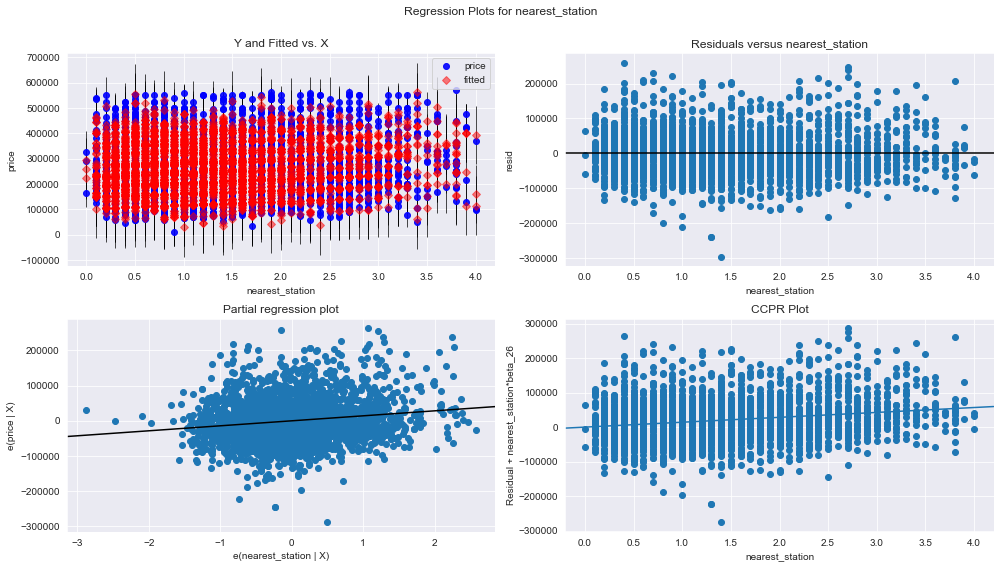

In [111]:
# Have a look to see if there is homoscedacitity
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(model_stepwise, 'nearest_station', fig=fig)

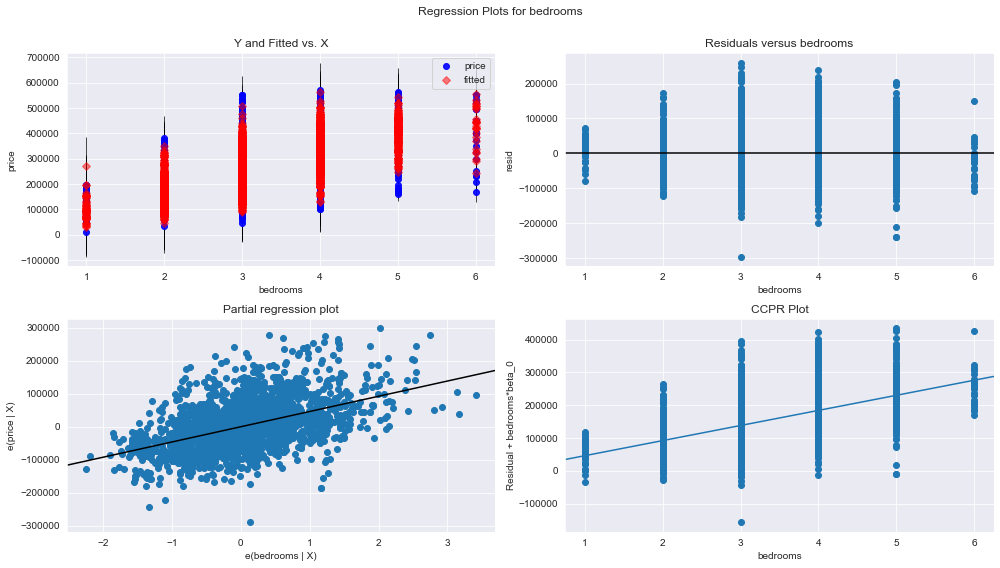

In [112]:
# Have a look to see if there is homoscedacitity
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(model_stepwise, 'bedrooms', fig=fig)

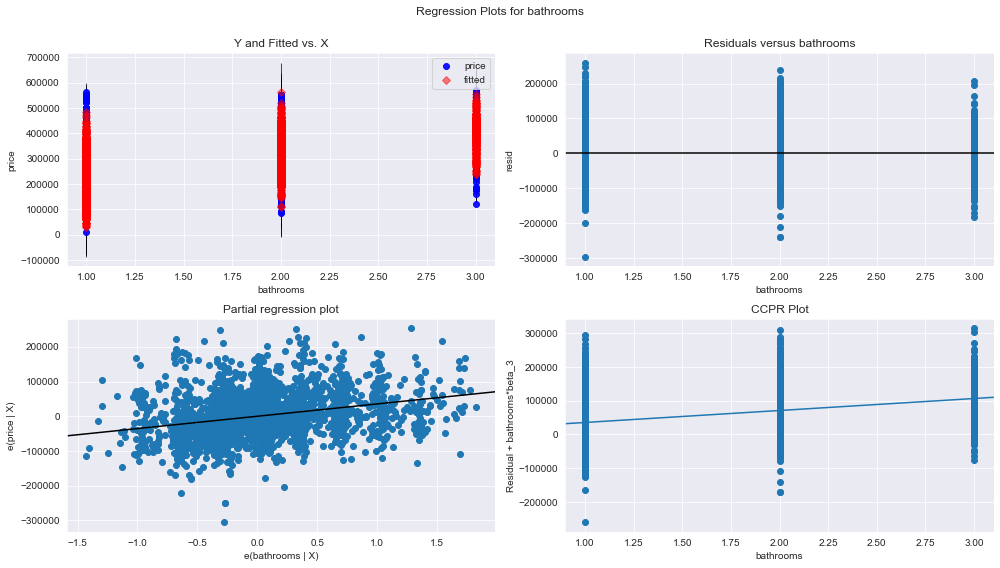

In [113]:
# Have a look to see if there is homoscedacitity
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(model_stepwise, 'bathrooms', fig=fig)

# Linear Regression model (satisfies all four assumptions)



Try a model that has all the features identified by stepwise regression analysis, however drop the nearest_station feature as it does not have a linear relationship with price

- Observe it's RMSE
- Adjusted R^2 value in comparison to Model 2 and the previous stepwise regression analysis 
- See if matches all the assumptions of linear regression

In [114]:
# Use the cols identified by the function above
feature_cols.remove('nearest_station')
feature_cols

['bedrooms',
 'Prop_Type_Terraced',
 'Prop_Type_Semi-Detached',
 'bathrooms',
 'Outcode_LS29',
 'Outcode_LS17',
 'Outcode_LS16',
 'Outcode_LS18',
 'Outcode_LS15',
 'Outcode_LS8',
 'Outcode_LS28',
 'Outcode_LS6',
 'Outcode_LS20',
 'Outcode_LS21',
 'Outcode_LS19',
 'Outcode_LS7',
 'Outcode_HD9',
 'Outcode_BD17',
 'Outcode_BD4',
 'Outcode_WF10',
 'Outcode_BD6',
 'Outcode_HD8',
 'Outcode_LS26',
 'Outcode_BD23',
 'Outcode_BD20',
 'Outcode_HX7',
 'Outcode_BD16',
 'Outcode_LS25',
 'Outcode_HD7',
 'Outcode_BD24',
 'Outcode_WF1',
 'Outcode_BD13',
 'Outcode_WF14',
 'Outcode_BD8',
 'Outcode_BD18',
 'Outcode_BD7',
 'Outcode_LS27',
 'Outcode_LS5',
 'Outcode_HD6',
 'Outcode_WF2',
 'Outcode_BD5',
 'Outcode_BD3',
 'Outcode_LS24',
 'Outcode_WF11',
 'Outcode_WF9',
 'Outcode_BD2',
 'Outcode_LS9',
 'Outcode_BD14',
 'Outcode_HX6',
 'const']

In [115]:
# Create the linear regression model with features decided by stepwise regression analysis and nearest_station feature removed
model_stepwise_2 = linreg_fitter(y_train, X_train[feature_cols])
print(model_stepwise_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     177.7
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:21:03   Log-Likelihood:                -39635.
No. Observations:                3198   AIC:                         7.937e+04
Df Residuals:                    3148   BIC:                         7.967e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
bedrooms                 4

In [116]:
# Make predictions on train
y_preds = model_stepwise_2.predict(X_train[feature_cols])
rmse = statsmodels.tools.eval_measures.rmse(y_train, y_preds)
print(rmse)

58376.92103097974


In [117]:
# Make predictions on test
y_preds_test = model_stepwise_2.predict(X_test[feature_cols])
rmse = statsmodels.tools.eval_measures.rmse(y_test, y_preds_test)
print(rmse)

58816.69097626599


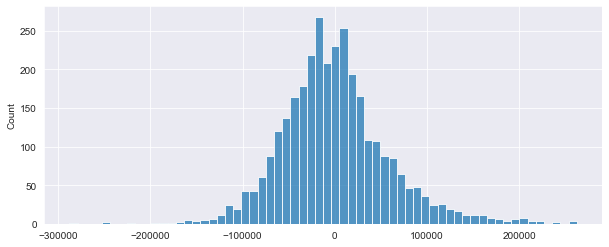

In [118]:
# a histogram of the residuals between y_train and y_pred
residuals = y_train - y_preds
fig = plt.figure(figsize=(10, 4))
sns.histplot(residuals)
plt.show()

# Once again can see a normality in the distribution of residuals
# Linear relationship between bedrooms and price and bathrooms and price

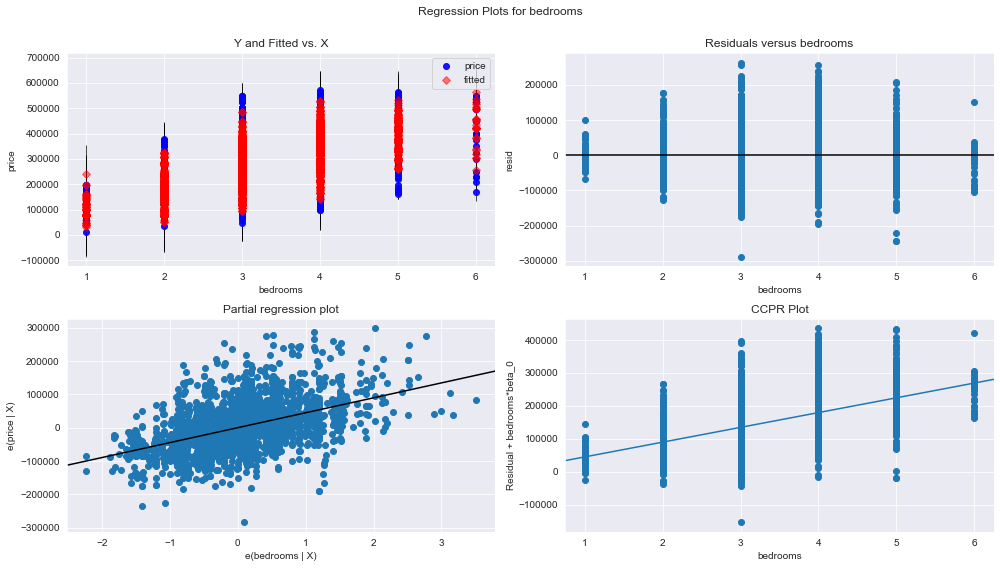

In [119]:
# Have a look to see if there is homoscedacitity
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(model_stepwise_2, 'bedrooms', fig=fig)

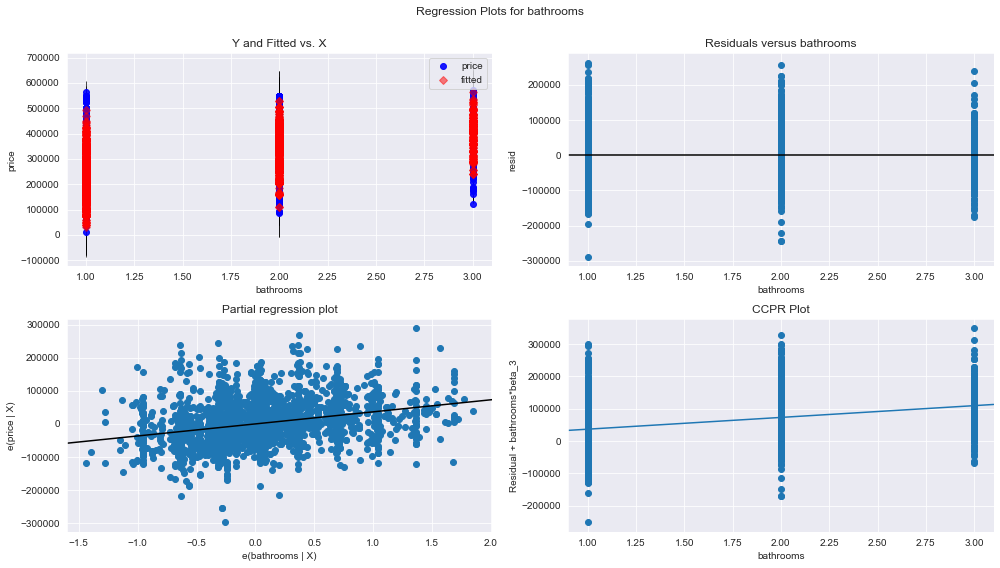

In [120]:
# Have a look to see if there is homoscedacitity
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(model_stepwise_2, 'bathrooms', fig=fig)

In [121]:
# I believe this model satisfies 4/4 of the assumptions of linear regression
# Has an okay RMSE similar to that of Model 2 Base model
# There is a normal distribution of residuals
# The variables of bedroom and bathroom show a linear relationship with price
# There is homoscedasticity
# The Cond No is low enough to mean that there isn't strong multicollinearity

# VIF model applied on all features

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

## This a piece of code from stats.stackexchange.com

## It runs the model with all of the variables.
## If any of them have a higher VIF than 5, it drops the max.
## Then it keeps going until none of them have a higher VIF than 5.
## This leaves us with a nice set of features with no collineraity

def calculate_vif(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        # this bit uses list comprehension to gather all the VIF values of the different variables
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))  # getting the index of the highest VIF value
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]  # we delete the highest VIF value on condition that it's higher than the threshold
            dropped = True  # if we deleted anything, we set the 'dropped' value to True to stay in the while loop

    print('Remaining variables:')
    print(X.columns[variables])  # finally, we print the variables that are still in our set
    return X.iloc[:, variables]  # and return our X cut down to the remaining variables

In [123]:
feature_cols = list(X_train.columns)
feature_cols.remove('const')

In [124]:
feature_cols

['bedrooms',
 'bathrooms',
 'nearest_station',
 'Prop_Type_Semi-Detached',
 'Prop_Type_Terraced',
 'Outcode_BD11',
 'Outcode_BD12',
 'Outcode_BD13',
 'Outcode_BD14',
 'Outcode_BD15',
 'Outcode_BD16',
 'Outcode_BD17',
 'Outcode_BD18',
 'Outcode_BD19',
 'Outcode_BD2',
 'Outcode_BD20',
 'Outcode_BD21',
 'Outcode_BD22',
 'Outcode_BD23',
 'Outcode_BD24',
 'Outcode_BD3',
 'Outcode_BD4',
 'Outcode_BD5',
 'Outcode_BD6',
 'Outcode_BD7',
 'Outcode_BD8',
 'Outcode_BD9',
 'Outcode_HD1',
 'Outcode_HD2',
 'Outcode_HD3',
 'Outcode_HD4',
 'Outcode_HD5',
 'Outcode_HD6',
 'Outcode_HD7',
 'Outcode_HD8',
 'Outcode_HD9',
 'Outcode_HX1',
 'Outcode_HX2',
 'Outcode_HX3',
 'Outcode_HX4',
 'Outcode_HX5',
 'Outcode_HX6',
 'Outcode_HX7',
 'Outcode_LS10',
 'Outcode_LS11',
 'Outcode_LS12',
 'Outcode_LS13',
 'Outcode_LS14',
 'Outcode_LS15',
 'Outcode_LS16',
 'Outcode_LS17',
 'Outcode_LS18',
 'Outcode_LS19',
 'Outcode_LS20',
 'Outcode_LS21',
 'Outcode_LS24',
 'Outcode_LS25',
 'Outcode_LS26',
 'Outcode_LS27',
 'Outcod

In [125]:
X_train_vif = calculate_vif(X_train[feature_cols])

dropping 'bedrooms' at index: 0
dropping 'nearest_station' at index: 1
dropping 'bathrooms' at index: 0
Remaining variables:
Index(['Prop_Type_Semi-Detached', 'Prop_Type_Terraced', 'Outcode_BD11',
       'Outcode_BD12', 'Outcode_BD13', 'Outcode_BD14', 'Outcode_BD15',
       'Outcode_BD16', 'Outcode_BD17', 'Outcode_BD18', 'Outcode_BD19',
       'Outcode_BD2', 'Outcode_BD20', 'Outcode_BD21', 'Outcode_BD22',
       'Outcode_BD23', 'Outcode_BD24', 'Outcode_BD3', 'Outcode_BD4',
       'Outcode_BD5', 'Outcode_BD6', 'Outcode_BD7', 'Outcode_BD8',
       'Outcode_BD9', 'Outcode_HD1', 'Outcode_HD2', 'Outcode_HD3',
       'Outcode_HD4', 'Outcode_HD5', 'Outcode_HD6', 'Outcode_HD7',
       'Outcode_HD8', 'Outcode_HD9', 'Outcode_HX1', 'Outcode_HX2',
       'Outcode_HX3', 'Outcode_HX4', 'Outcode_HX5', 'Outcode_HX6',
       'Outcode_HX7', 'Outcode_LS10', 'Outcode_LS11', 'Outcode_LS12',
       'Outcode_LS13', 'Outcode_LS14', 'Outcode_LS15', 'Outcode_LS16',
       'Outcode_LS17', 'Outcode_LS18', 'Outcod

In [126]:
# Add constant
X_train_vif = sm.add_constant(X_train_vif)

In [127]:
# Create the fourth linear regression model
model_vif = linreg_fitter(y_train, X_train_vif)
print(model_vif.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     52.49
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:21:10   Log-Likelihood:                -40379.
No. Observations:                3198   AIC:                         8.092e+04
Df Residuals:                    3116   BIC:                         8.142e+04
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3

In [128]:
# Make predictions on train
y_preds = model_vif.predict(X_train_vif)
rmse = statsmodels.tools.eval_measures.rmse(y_train, y_preds)
print(rmse)

73665.36747410147


In [129]:
feature_cols_vif = list(X_train_vif.columns)

In [130]:
# Make predictions on train
y_test_preds = model_vif.predict(X_test[feature_cols_vif])
rmse = statsmodels.tools.eval_measures.rmse(y_test, y_test_preds)
print(rmse)

74500.6677686006


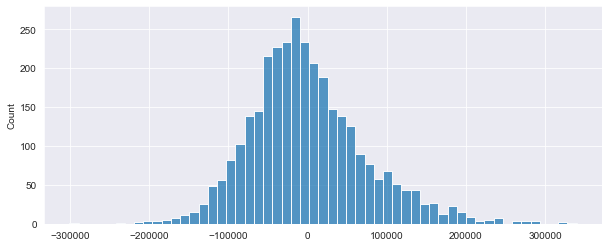

In [131]:
# a histogram of the residuals between y_train and y_pred
residuals = y_train - y_preds
fig = plt.figure(figsize=(10, 4))
sns.histplot(residuals)
plt.show()

# Does show a normal distribution of residuals
# Think there is Independence
# No variables that remain are numerical in nature
# However a very high RMSE value

# DecisionTreeRegressor



In [135]:
from sklearn.tree import DecisionTreeRegressor
from time import time # Measure how long my code takes to run

In [136]:
def feature_eng_ohe_first_kept(df):
    # Drop following columns
    df = df.drop(columns=['url', 'address', 'tenure', 'cleaned_address','gcode','outcode_from_gcode'])
    # One Hot Encode following columns
    df = pd.get_dummies(df, columns = ['property_type'], prefix = 'Prop_Type') # We do not drop first
    df = pd.get_dummies(df, columns = ['outcode'],  prefix = 'Outcode') # We do not drop first
    return df

In [137]:
df = pd.read_csv('../Data/dataset_for_modelling.csv')

In [138]:
# Drop rows as done previously that causes issues when OHE due to the low value count of their associated outcode value
df = df.drop([0, 1, 2, 303, 570, 639, 645, 648, 751, 1345, 1346])

In [139]:
df.shape[0]

3998

In [140]:
allfeatures = list(df.columns)
allfeatures.remove('price')
# Create X, and y.
X = df[allfeatures]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [141]:
X_train = feature_eng_ohe_first_kept(X_train)

In [142]:
X_train.head()

,bedrooms,bathrooms,nearest_station,Prop_Type_Detached,Prop_Type_Semi-Detached,Prop_Type_Terraced,Outcode_BD10,Outcode_BD11,Outcode_BD12,Outcode_BD13,...,Outcode_WF16,Outcode_WF17,Outcode_WF2,Outcode_WF3,Outcode_WF4,Outcode_WF5,Outcode_WF6,Outcode_WF7,Outcode_WF8,Outcode_WF9
1586,2,1,2.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
510,3,2,0.9,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3604,3,1,1.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3573,1,1,1.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3231,2,1,2.1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [143]:
dtreg = DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=5)

In [144]:
dtreg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=5)

In [145]:
dtreg.feature_importances_

array([5.20692445e-01, 3.86306984e-02, 3.20683098e-02, 6.31586851e-02,
       5.06083733e-02, 1.50927500e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.47070366e-03, 0.00000000e+00, 3.06753232e-04,
       1.10075030e-03, 4.50799105e-04, 0.00000000e+00, 3.07419116e-04,
       9.33880455e-04, 6.10930068e-03, 0.00000000e+00, 1.53464947e-03,
       4.43795704e-04, 0.00000000e+00, 0.00000000e+00, 2.07744760e-03,
       0.00000000e+00, 2.29244665e-04, 0.00000000e+00, 0.00000000e+00,
       8.22387746e-04, 1.42115180e-03, 0.00000000e+00, 0.00000000e+00,
       2.89659796e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.02579689e-03, 2.65060670e-03, 3.15693343e-04,
       1.67281273e-03, 0.00000000e+00, 1.42718755e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.35874449e-04,
       0.00000000e+00, 5.92609366e-04, 8.54513268e-03, 1.49708430e-02,
       1.12757083e-02, 1.19275042e-02, 3.64710154e-03, 3.97774959e-03,
      

In [146]:
y_pred = dtreg.predict(X_train)

In [147]:
rmse = statsmodels.tools.eval_measures.rmse(y_train, y_pred)
print(rmse)

58486.62053042997


In [148]:
X_test = feature_eng_ohe_first_kept(X_test)

In [149]:
X_test.head()

,bedrooms,bathrooms,nearest_station,Prop_Type_Detached,Prop_Type_Semi-Detached,Prop_Type_Terraced,Outcode_BD10,Outcode_BD11,Outcode_BD12,Outcode_BD13,...,Outcode_WF16,Outcode_WF17,Outcode_WF2,Outcode_WF3,Outcode_WF4,Outcode_WF5,Outcode_WF6,Outcode_WF7,Outcode_WF8,Outcode_WF9
1771,2,1,3.0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3337,2,1,1.1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1781,4,1,3.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3187,2,1,0.4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2110,4,2,2.7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
y_pred_test = dtreg.predict(X_test)

In [151]:
rmse = statsmodels.tools.eval_measures.rmse(y_test, y_pred_test)
print(rmse)

66841.2488371052


- Can see a lot of overfitting for this DecisionTreeRegressor, let's use GridSearchCV to find the best hyperparameters to make a robust DecisionTreeRegressor i.e. handle overfitting

# Robust Decision Tree Regressor

In [152]:
from sklearn.model_selection import GridSearchCV # Helps us select the best parameters for model
grid = GridSearchCV(estimator = DecisionTreeRegressor(),
                    param_grid = {'max_depth': [3, 5, 7, 10, 12, 15, 20],
                                  'min_samples_split': [50, 100, 150, 200, 500, 1000], # Minimum number of samples to make a split
                                  'min_samples_leaf': [20, 30, 40, 50, 60, 70], # Minimum number of samples to have in a leaf
                                  'max_features':[2,86]}, # How many features it will use to make a decision
                    cv = 10, # Number of folds it uses
                    refit = True, # Should I learn from previous iterations
                    verbose = 1, # Either 0,1 or 2 how much should I tell the programmer
                    scoring = 'neg_mean_squared_error') # Which metric am I looking to prioritise

In [153]:
# Timing the grid search using the timing library
now = time()
grid.fit(X_train, y_train)
print(f' Time in seconds: {time() - now}')

Fitting 10 folds for each of 504 candidates, totalling 5040 fits
 Time in seconds: 32.65267539024353


In [154]:
# Check the best parameters resulting from our search!
grid.best_params_

{'max_depth': 12,
 'max_features': 86,
 'min_samples_leaf': 20,
 'min_samples_split': 100}

In [155]:
grid.best_score_

-5274767785.531389

In [156]:
# This is the best model I came up with
grid.best_estimator_

DecisionTreeRegressor(max_depth=12, max_features=86, min_samples_leaf=20,
                      min_samples_split=100)

In [157]:
# DecisionTreeRegressor with hyperparameters identified by GridSearchCV
robustdectreereg = DecisionTreeRegressor(max_depth=12, max_features=86, min_samples_split=100, min_samples_leaf=20)

In [158]:
robustdectreereg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=12, max_features=86, min_samples_leaf=20,
                      min_samples_split=100)

In [159]:
y_pred = robustdectreereg.predict(X_train)

In [160]:
# RMSE of robust dtregressor on train
rmse = statsmodels.tools.eval_measures.rmse(y_train, y_pred)
print(rmse)

69423.22479862683


In [161]:
y_pred_test = robustdectreereg.predict(X_test)

In [162]:
# RMSE of robust dtregressor on test
rmse = statsmodels.tools.eval_measures.rmse(y_test, y_pred_test)
print(rmse)

70398.33416169672


In [ ]:
# Can see that this is robust, no overfitting between train and test - diff of around £1000
# This is still not better than the linear regression model that satisfies the four assumptions of linear regression with nearest station not used as a value for RMSE

# KNeighborsRegressor

- See the performance of the KNeighbourRegressor
- Will find the best hyperparameters for k and distance metric
- Will look for the most robust model (least likely to have overfitting)
- See what value of k from the graph means the least overfitting 

In [163]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt

In [164]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train) ## Fit on train!!!

X_train_scaled = scaler.transform(X_train) ##  Transform the training set according to the scaler
X_test_scaled = scaler.transform(X_test) ## Transform on the testing set according to the scaler
X_train = pd.DataFrame(X_train_scaled) # Make into dataframe 
X_test = pd.DataFrame(X_test_scaled) # Make into dataframe

In [165]:
# See if changes have applied
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,0.2,0.0,0.500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.4,0.5,0.225,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.4,0.0,0.250,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.250,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.2,0.0,0.525,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [166]:
# See if changes have applied
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,0.2,0.0,0.750,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.2,0.0,0.275,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.6,0.0,0.750,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.2,0.0,0.100,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.6,0.5,0.675,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
# Use a GridSearch to find the best K value and the best distance metric
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],
          'metric' : ['minkowski', 'euclidean', 'manhattan', 'hamming'],
          }

In [168]:
# Use GridSearch to find the best value for K and the best distance metric
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=10)
model.fit(X_train, y_train)
model.best_params_

{'metric': 'hamming', 'n_neighbors': 9}

In [169]:
# Get all the RMSE values when using k and hamming distance as the distance metric
rmse_val = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K, metric='hamming')

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_train) #make prediction on train set
    error = sqrt(mean_squared_error(y_train, pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 27093.20435680458
RMSE value for k=  2 is: 42340.261616985714
RMSE value for k=  3 is: 48651.96598272353
RMSE value for k=  4 is: 51591.88597329341
RMSE value for k=  5 is: 53851.36144866148
RMSE value for k=  6 is: 55748.492354396694
RMSE value for k=  7 is: 56641.40737887675
RMSE value for k=  8 is: 57434.546976272475
RMSE value for k=  9 is: 58177.593724863495
RMSE value for k=  10 is: 59130.56666942541
RMSE value for k=  11 is: 59754.939577452504
RMSE value for k=  12 is: 60363.35606577996
RMSE value for k=  13 is: 60725.210457057794
RMSE value for k=  14 is: 61175.13426673032
RMSE value for k=  15 is: 61639.767810970116
RMSE value for k=  16 is: 61892.33018183561
RMSE value for k=  17 is: 62252.85730499944
RMSE value for k=  18 is: 62586.68017300602
RMSE value for k=  19 is: 62871.41567149323
RMSE value for k=  20 is: 63097.36275818689
RMSE value for k=  21 is: 63332.967301992394
RMSE value for k=  22 is: 63640.395056486086
RMSE value for k=  23 is: 63837.

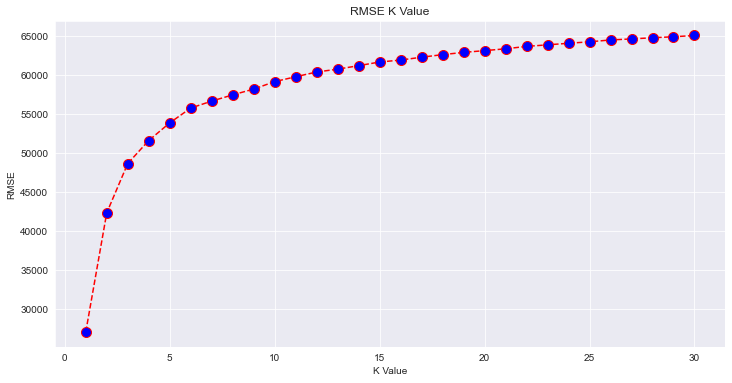

In [170]:
## Pick a value for K
## Never pick K equals 1
plt.figure(figsize=(12, 6))
plt.plot(range(1, 31)
         , rmse_val
         , color='red'
         , linestyle='dashed'
         , marker='o'
         , markerfacecolor='blue'
         , markersize=10)
plt.title('RMSE K Value')
plt.xlabel('K Value')
plt.ylabel('RMSE')
plt.show()

In [171]:
# Make a prediction on test using with best value for K as identified by grid search, and the best distance metric
knnreg = neighbors.KNeighborsRegressor(n_neighbors = 9, metric='hamming')
knnreg.fit(X_train, y_train)
pred_test=knnreg.predict(X_test) #make prediction on test set

In [172]:
rmseerror = sqrt(mean_squared_error(y_test, pred_test)) #calculate rmse on test
rmseerror

62888.66521257533

## Notes on KNeighborRegressor
- When K=9 and using hamming distance for the distance metric for the KNN regressor as defined to be the best hyperparameters for KNREegressor by gridsearch
- The RMSE on train when K is 9 is: £58177.593724863495
- Whilst the RMSE on test is: £62888.66521257533
- This is a lot of overfitting in comparison to the LR and DTRegressor
- This is the most robust as it has the best average rmse score over the 10 folds of unseen data for training set

# Selecting best model 

Model                  |Features used                  | RMSE on Train  | RMSE on Test     |
-----------------------|-------------------------------|----------------|------------------|
Linear Regression      |All apart from nearest_station | £58376.92      | £58816.70        |
DecisionTreeRegressor  |All                            | £69423.22      | £70398.33        |
KNeighborsRegressor    |All                            | £58177.60      | £62888.67        |

- This shows Linear Regression to be the best however for the case of our function, having a typical error of nearly £60,000 is not great

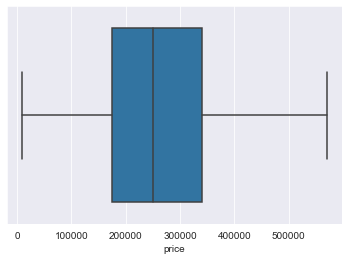

In [173]:
# Do a boxplot for price
sns.boxplot(data=df, x='price')
plt.show()

In [174]:
# Median value for price - £250,000
df.describe()

,bedrooms,bathrooms,nearest_station,price
count,3998.000000,3998.000000,3998.000000,3998.000000
mean,3.158579,1.431216,1.358954,264604.540020
std,0.874322,0.628444,0.836046,113768.320742
min,1.000000,1.000000,0.000000,10000.000000
25%,3.000000,1.000000,0.700000,175000.000000
50%,3.000000,1.000000,1.200000,250000.000000
75%,4.000000,2.000000,1.900000,340000.000000
max,6.000000,3.000000,4.000000,570000.000000


Perhaps I could split the data to build two Linear Regression models, one for lower price properties and one for higher properties

- Lower price properties would lie in the range of £10000-£250,000
- High price properties would lie in the range of £250,001-£570,000

In [175]:
df.shape[0]

3998

In [176]:
# Split the data
df_low_price = df[(df['price'] >= 10000) & (df['price'] <= 250000)]

In [177]:
df_low_price.shape[0]

2084

In [178]:
# Issue with some of these properties
# Too few observations will mess up the split by train test split
df_low_price['outcode'].value_counts().sort_values()

BD24     4
LS16     4
LS24     4
HX4      5
LS20     7
        ..
LS12    56
WF6     57
WF2     61
WF10    65
WF4     71
Name: outcode, Length: 80, dtype: int64

In [179]:
# Split the data
df_higher_price = df[(df['price'] > 250000) & (df['price'] <= 570000)]

In [180]:
df_higher_price.shape[0]

1914

In [181]:
# Issue with some of these properties
# Too few observations will mess up OHE of this column
df_higher_price['outcode'].value_counts().sort_values()

BD8      1
BD7      1
BD3      2
LS9      2
BD21     2
        ..
LS26    56
LS25    63
WF4     70
WF2     76
LS15    85
Name: outcode, Length: 80, dtype: int64

#  Linear Regression - for lower price properties (£10,000-£250,000)

In [250]:
# Linear Regression - for lower price properties
# Will not make use of the nearest_station feature as to make this sure this feature satisfies all four assumptions of Linear Regression
# Create a column of all features
allfeatures = list(df_low_price.columns)
allfeatures.remove('price')
# Create X, and y.
X = df_low_price[allfeatures]
y = df_low_price['price']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [251]:
## Transform
X_train = feature_eng_ohe_outcode_and_proptype(X_train)
X_test = feature_eng_ohe_outcode_and_proptype(X_test)

In [252]:
X_train.head()

,const,bedrooms,bathrooms,nearest_station,Prop_Type_Semi-Detached,Prop_Type_Terraced,Outcode_BD11,Outcode_BD12,Outcode_BD13,Outcode_BD14,...,Outcode_WF16,Outcode_WF17,Outcode_WF2,Outcode_WF3,Outcode_WF4,Outcode_WF5,Outcode_WF6,Outcode_WF7,Outcode_WF8,Outcode_WF9
3666,1.0,2,1,2.1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3522,1.0,3,1,0.4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
650,1.0,3,1,0.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194,1.0,3,1,1.6,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3589,1.0,4,2,0.8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [253]:
X_test.head()

,const,bedrooms,bathrooms,nearest_station,Prop_Type_Semi-Detached,Prop_Type_Terraced,Outcode_BD11,Outcode_BD12,Outcode_BD13,Outcode_BD14,...,Outcode_WF16,Outcode_WF17,Outcode_WF2,Outcode_WF3,Outcode_WF4,Outcode_WF5,Outcode_WF6,Outcode_WF7,Outcode_WF8,Outcode_WF9
3697,1.0,3,1,0.6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1672,1.0,3,1,2.6,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2739,1.0,3,2,0.9,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1940,1.0,6,1,0.4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3450,1.0,2,1,0.9,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [254]:
# Remove the nearest_station column from the list of feature columns to use - does not have a linear relationship with price
feature_cols = list(X_train.columns)
feature_cols.remove('nearest_station')
feature_cols.remove('const') 

In [255]:
# Apply stepwise regression analysis
# Made sure to remove the const column
result = stepwise_selection(X_train[feature_cols], y_train)
print('resulting features:')
print(result)

Add  Prop_Type_Terraced             with p-value 2.9372e-103
Add  bedrooms                       with p-value 4.26167e-47
Add  bathrooms                      with p-value 2.11911e-10
Add  Outcode_LS15                   with p-value 5.88451e-10
Add  Outcode_LS26                   with p-value 1.83889e-06
Add  Outcode_LS28                   with p-value 1.43572e-06
Add  Outcode_LS18                   with p-value 1.77696e-06
Add  Prop_Type_Semi-Detached        with p-value 2.52223e-06
Add  Outcode_LS4                    with p-value 3.66193e-06
Add  Outcode_LS19                   with p-value 4.29173e-06
Add  Outcode_BD8                    with p-value 7.78418e-06
Add  Outcode_BD4                    with p-value 7.26024e-06
Add  Outcode_BD5                    with p-value 8.27593e-06
Add  Outcode_BD3                    with p-value 7.41645e-06
Add  Outcode_LS29                   with p-value 1.25835e-05
Add  Outcode_HD9                    with p-value 1.56166e-05
Add  Outcode_BD18       

In [256]:
# Make the feature columns those that are statistically significant as shown above
feature_cols = result
feature_cols.append('const')

In [257]:
# Create the linear regression model with features decided by stepwise regression analysis and nearest_station feature removed
lrmodel_low = linreg_fitter(y_train, X_train[feature_cols])
print(lrmodel_low.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     45.91
Date:                Tue, 28 Mar 2023   Prob (F-statistic):          1.42e-263
Time:                        16:42:47   Log-Likelihood:                -19619.
No. Observations:                1667   AIC:                         3.934e+04
Df Residuals:                    1618   BIC:                         3.960e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Prop_Type_Terraced      -6

In [258]:
# Make predictions on train
y_preds = lrmodel_low.predict(X_train[feature_cols])
rmse = statsmodels.tools.eval_measures.rmse(y_train, y_preds)
print(rmse)

31260.82910682964


In [259]:
# Make predictions on test
y_preds_test = lrmodel_low.predict(X_test[feature_cols])
rmse = statsmodels.tools.eval_measures.rmse(y_test, y_preds_test)
print(rmse)

KeyError: "['Outcode_LS18', 'Outcode_LS4'] not in index"

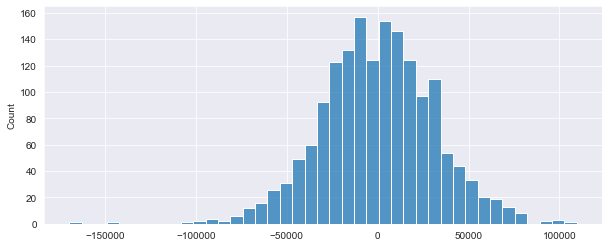

In [260]:
## Check does it still match the assumptions of linear regression
# a histogram of the residuals between y_train and y_pred
residuals = y_train - y_preds
fig = plt.figure(figsize=(10, 4))
sns.histplot(residuals)
plt.show()

# Once again can see a normality in the distribution of residuals
# Linear relationship between bedrooms and price and bathrooms and price

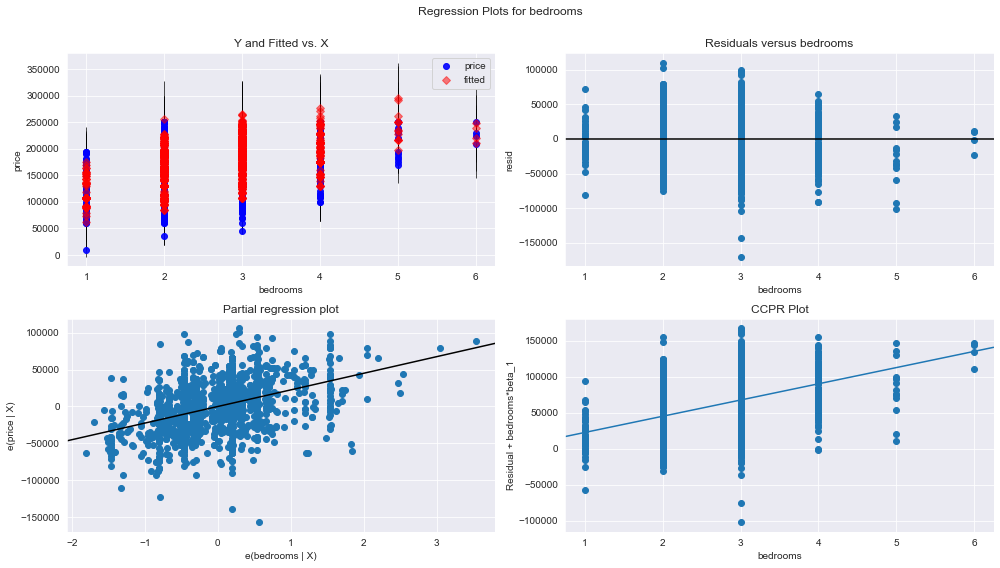

In [261]:
# Have a look to see if there is homoscedacitity
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(lrmodel_low, 'bedrooms', fig=fig)

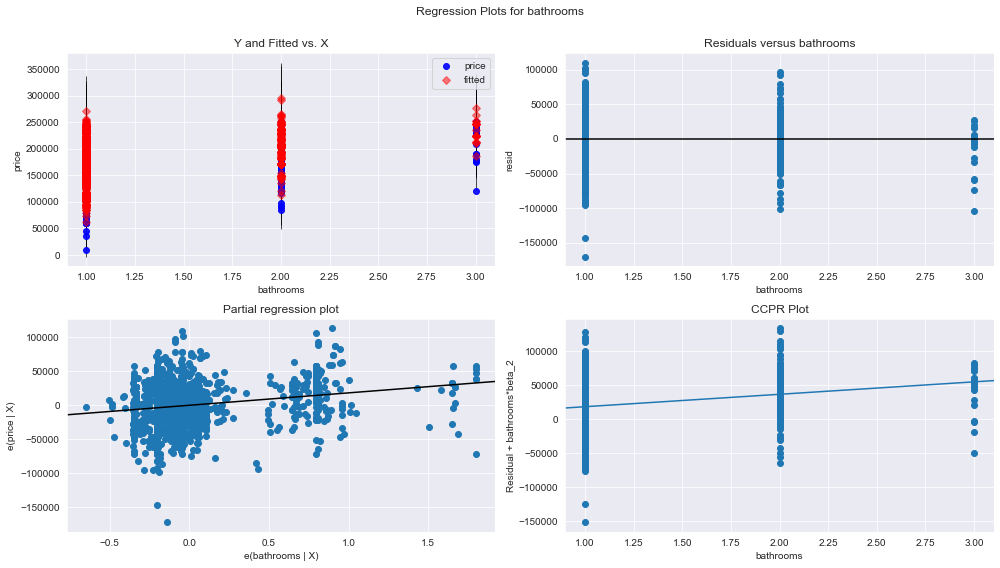

In [262]:
# Have a look to see if there is homoscedacitity
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(lrmodel_low, 'bathrooms', fig=fig)

- This model satisfies all 4 assumptions of linear regression

# Linear Regression - for higher price properties (£250,001-£570,000)

In [291]:
# Linear Regression - for higher price properties
# Will not make use of the nearest_station feature as to make this sure this feature satisfies all four assumptions of Linear Regression
# Create a column of all features
allfeatures = list(df_higher_price.columns)
allfeatures.remove('nearest_station') # Remove the nearest_station column from the list of feature columns to use - does not have a linear relationship with price
allfeatures.remove('price')
# Create X, and y.
X = df_higher_price[allfeatures]
y = df_higher_price['price']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [292]:
X_train = feature_eng_ohe_outcode_and_proptype(X_train)
X_test = feature_eng_ohe_outcode_and_proptype(X_test)

In [293]:
feature_cols = list(X_train.columns)
feature_cols.remove('const') 

In [294]:
# Apply stepwise regression analysis
# Made sure to remove the const column
result = stepwise_selection(X_train[feature_cols], y_train)
print('resulting features:')
print(result)

Add  bedrooms                       with p-value 2.66171e-70
Add  Prop_Type_Semi-Detached        with p-value 1.7892e-16
Add  Prop_Type_Terraced             with p-value 3.08346e-12
Add  Outcode_LS29                   with p-value 1.75443e-13
Add  Outcode_LS17                   with p-value 1.68759e-11
Add  Outcode_LS16                   with p-value 4.31985e-08
Add  bathrooms                      with p-value 8.0083e-09
Add  Outcode_LS8                    with p-value 2.84634e-06
Add  Outcode_LS18                   with p-value 1.4065e-06
Add  Outcode_BD4                    with p-value 5.08507e-06
Add  Outcode_WF10                   with p-value 6.18242e-06
Add  Outcode_LS15                   with p-value 0.000200037
Add  Outcode_HD9                    with p-value 0.000536141
Add  Outcode_BD17                   with p-value 0.000510432
Add  Outcode_LS6                    with p-value 0.000441543
Add  Outcode_BD6                    with p-value 0.0010641
Add  Outcode_LS10            

In [295]:
# Make the feature columns those that are statistically significant as shown above
feature_cols = result
feature_cols.append('const')

In [296]:
# Create the linear regression model with features decided by stepwise regression analysis and nearest_station feature removed
lrmodel_high = linreg_fitter(y_train, X_train[feature_cols])
print(lrmodel_high.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     39.51
Date:                Tue, 28 Mar 2023   Prob (F-statistic):          6.64e-158
Time:                        16:46:23   Log-Likelihood:                -19033.
No. Observations:                1531   AIC:                         3.812e+04
Df Residuals:                    1502   BIC:                         3.828e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
bedrooms                 3

In [297]:
# Make predictions on train
y_preds = lrmodel_high.predict(X_train[feature_cols])
rmse = statsmodels.tools.eval_measures.rmse(y_train, y_preds)
print(rmse)

60644.94209062312


In [298]:
# Make predictions on test
y_preds_test = lrmodel_high.predict(X_train[feature_cols])
rmse = statsmodels.tools.eval_measures.rmse(y_test, y_preds_test)
print(rmse)

ValueError: operands could not be broadcast together with shapes (383,) (1531,) 

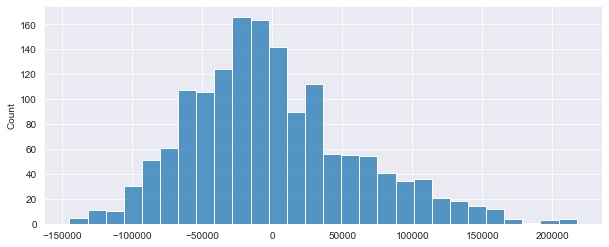

In [299]:
## Check does it still match the assumptions of linear regression
# a histogram of the residuals between y_train and y_pred
residuals = y_train - y_preds
fig = plt.figure(figsize=(10, 4))
sns.histplot(residuals)
plt.show()
# This does the match four assumptions of linear reggression
# Linear relationship between bedrooms and price and bathrooms and price
# Normal distribution of residuals - as evidenced by the shapiro test

In [300]:
from scipy import stats
shapiro_test = stats.shapiro(residuals)

In [301]:
shapiro_test.statistic

0.976138174533844

In [302]:
shapiro_test.pvalue

2.95056917978397e-15

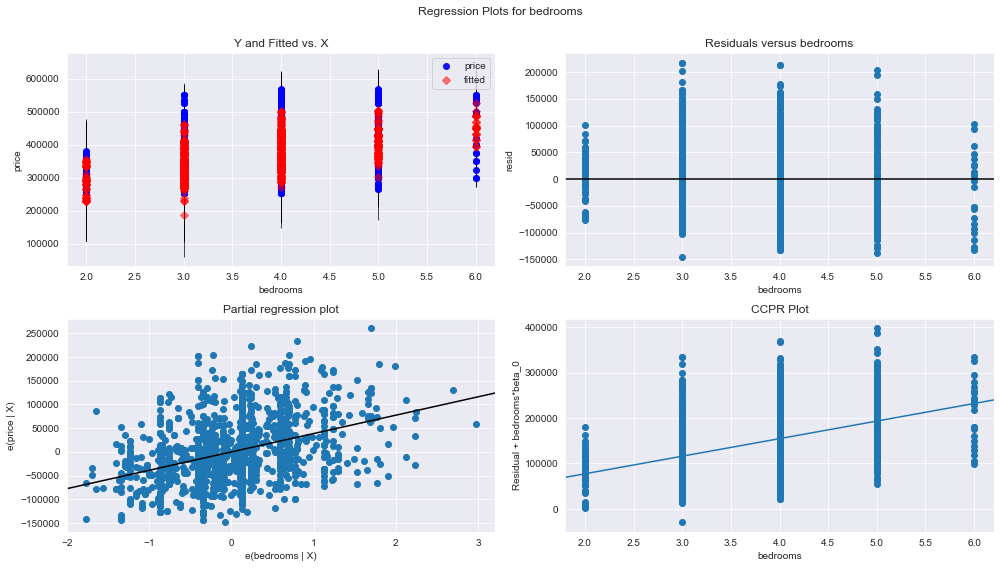

In [303]:
# Have a look to see if there is homoscedacitity - there is
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(lrmodel_high, 'bedrooms', fig=fig)

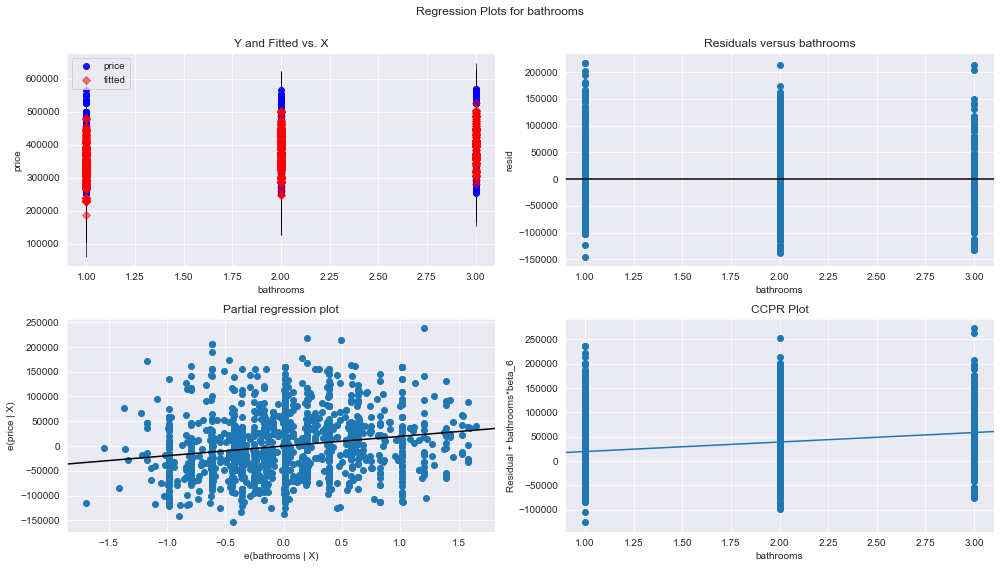

In [304]:
# Have a look to see if there is homoscedacitity - there is
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(lrmodel_high, 'bathrooms', fig=fig)